# Mac Address Feature Correlations

The notebook aims at understanding the mac addresses using a clustering algorithm (k-means) to determine whether the mac addresses are stationary or moving (shoppers).

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
matplotlib.style.use('ggplot')

import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from msci.utils import utils

## Import the data and create mac address data frame

In [5]:
mac_address_df = utils.import_mac_addresses()

In [6]:
print('{} mac addresses with {} features'.format(mac_address_df.shape[0], mac_address_df.shape[1]))

154152 mac addresses with 20 features


In [7]:
mac_address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154152 entries, 0 to 154151
Data columns (total 20 columns):
frequency                    154152 non-null int64
mac_address                  154152 non-null object
centroid                     154152 non-null object
radius_of_gyration           154152 non-null float64
manufacturer                 49037 non-null object
count_density_variance       51030 non-null float64
length_of_stay               154152 non-null int64
is_out_of_hours              154152 non-null int64
av_speed                     71306 non-null float64
av_turning_angle             49004 non-null float64
total_turning_angle          56809 non-null float64
av_turning_angle_velocity    39373 non-null float64
av_path_length               82645 non-null float64
total_path_length            82645 non-null float64
av_straightness              55506 non-null float64
shopper                      154152 non-null float64
mall_worker                  154152 non-null float64
statio

In [8]:
mac_address_df.describe()

,frequency,radius_of_gyration,count_density_variance,length_of_stay,is_out_of_hours,av_speed,av_turning_angle,total_turning_angle,av_turning_angle_velocity,av_path_length,total_path_length,av_straightness,shopper,mall_worker,stationary_device,other
count,154152.000000,154152.000000,51030.000000,154152.000000,154152.000000,71306.000000,49004.000000,56809.000000,39373.000000,82645.000000,82645.000000,55506.000000,154152.00,154152.00,154152.00,154152.00
mean,17.923368,18.091681,1.843007,3582.182028,0.008803,1.132149,1.740233,55.274481,0.001011,29.395143,526.959549,2.143744,0.25,0.25,0.25,0.25
std,101.616465,29.572937,1.759489,10723.404720,0.093411,2.082923,0.693630,223.301118,0.714252,37.998623,1640.536252,2.220800,0.00,0.00,0.00,0.00
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.141593,0.000000,0.000000,1.000000,0.25,0.25,0.25,0.25
25%,1.000000,0.000000,0.577350,0.000000,0.000000,0.194047,1.391763,2.458314,-0.115019,7.519667,16.492423,1.166403,0.25,0.25,0.25,0.25
50%,2.000000,0.000000,1.414214,0.000000,0.000000,0.525975,1.726369,8.330726,0.004045,17.606509,97.723198,1.760363,0.25,0.25,0.25,0.25
75%,5.000000,25.123468,2.828427,446.000000,0.000000,1.108135,2.107721,31.937558,0.135000,35.503521,448.003436,2.472613,0.25,0.25,0.25,0.25
max,6606.000000,165.934475,20.506097,86335.000000,1.000000,95.081544,3.141593,6745.491906,3.141593,331.868950,140958.829109,224.111577,0.25,0.25,0.25,0.25


In [14]:
mac_address_df = mac_address_df[mac_address_df.frequency > 10]

In [15]:
mac_address_df['av_speed2'] = mac_address_df['total_path_length'] / mac_address_df['length_of_stay']
mac_address_df['turning_angle_per_meter'] = mac_address_df['total_turning_angle'] / mac_address_df['total_path_length']
mac_address_df['x'] = mac_address_df['centroid'].str[1:-1].str.split().str[0].astype(float)
mac_address_df['y'] = mac_address_df['centroid'].str[1:-1].str.split().str[1].astype(float)

In [16]:
max_count_columns = [
    "frequency", "radius_of_gyration", "count_density_variance", "length_of_stay", "av_speed", "total_turning_angle", 
    "av_path_length", "total_path_length", "av_straightness", "is_out_of_hours", "av_speed2", "turning_angle_per_meter", 'x', 'y'
]

min_count_columns = [
    "frequency", "radius_of_gyration", "count_density_variance", "length_of_stay", "av_speed", 
    "av_turning_angle", "total_turning_angle", "av_turning_angle_velocity", "av_path_length", "total_path_length", 
    "av_straightness", "is_out_of_hours", "av_speed2",
]

mac_address_all_df = mac_address_df.copy()
mac_address_max_df = mac_address_df[max_count_columns].copy().dropna()
mac_address_min_df = mac_address_df[min_count_columns].copy().dropna()

In [17]:
print(mac_address_df.is_out_of_hours.value_counts())

0    25137
1      696
Name: is_out_of_hours, dtype: int64


## Correlation Plots

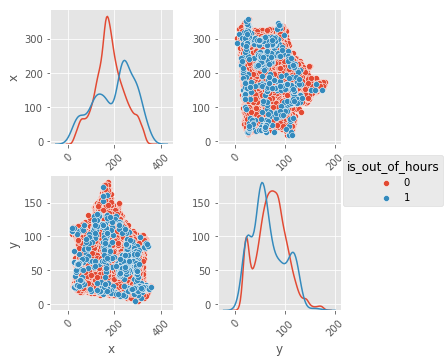

In [19]:
g = sns.pairplot(
    mac_address_max_df, 
    vars=[
        "x", "y"
    ],
    hue=wher, diag_kind="kde", dropna=True
)
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

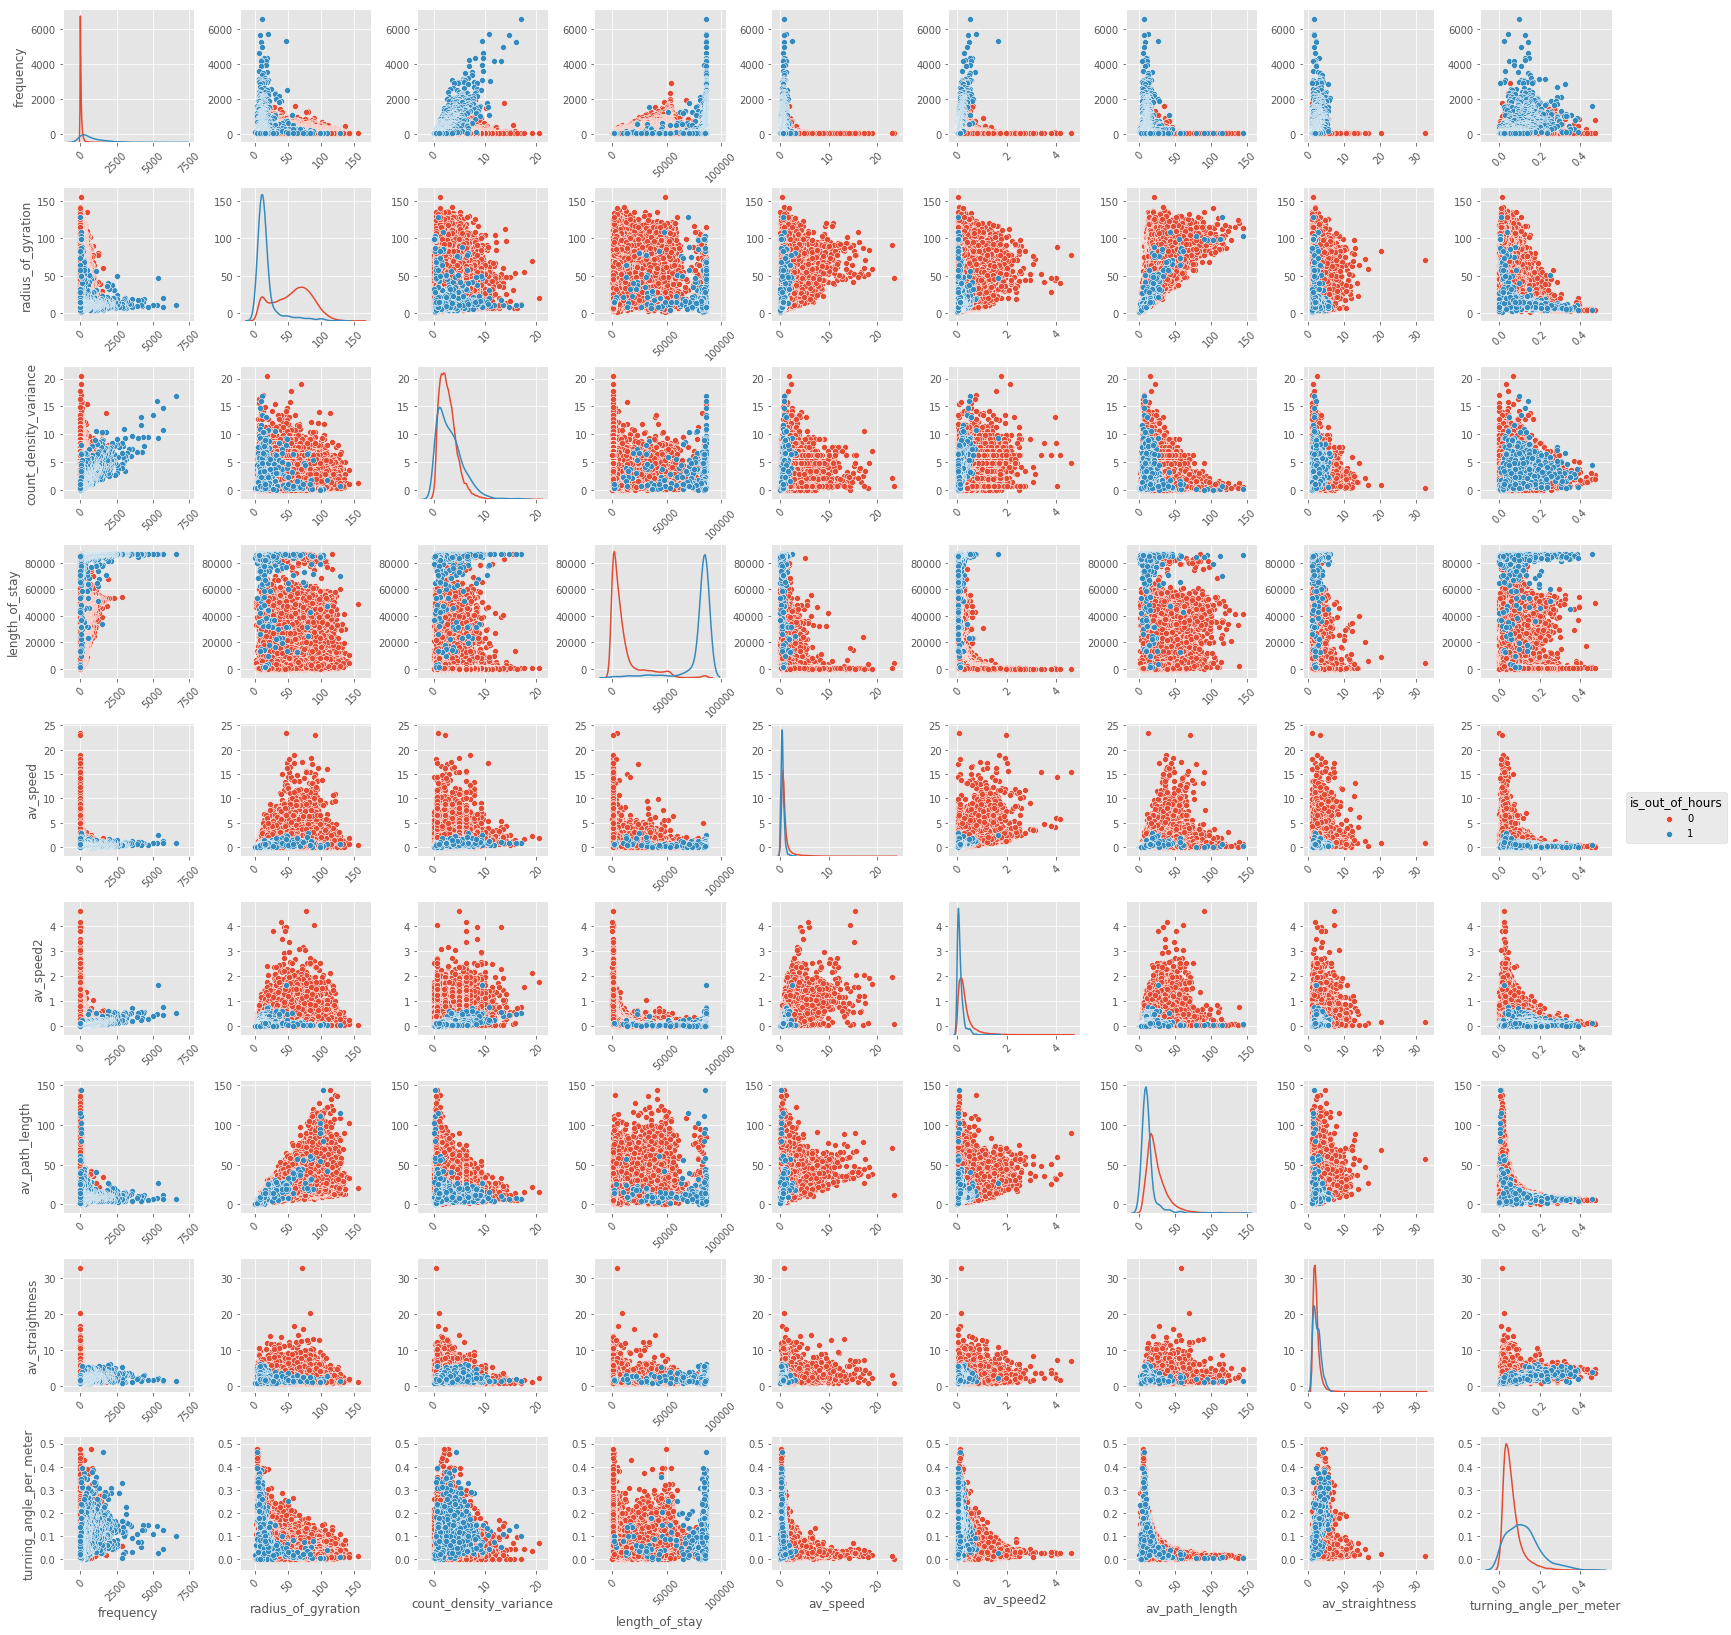

In [18]:
g = sns.pairplot(
    mac_address_max_df, 
    vars=[
        "frequency", "radius_of_gyration", "count_density_variance", "length_of_stay", "av_speed", "av_speed2",
        "av_path_length", "av_straightness", "turning_angle_per_meter",
    ],
    hue="is_out_of_hours", diag_kind="kde", dropna=True
)
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

In [ ]:
g = sns.pairplot(
    mac_address_min_df, 
    vars=[
        "frequency", "radius_of_gyration", "count_density_variance", "length_of_stay", "av_speed", 
        "av_turning_angle", "av_turning_angle_velocity", "av_path_length", "total_path_length", 
        "av_straightness",
    ],
    hue="is_out_of_hours", diag_kind="kde", dropna=True
)
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

## Fitting distributions

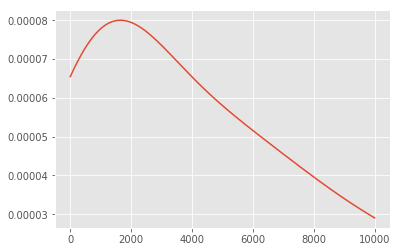

In [20]:
straightness_values = mac_address_df[mac_address_df.is_out_of_hours == 0]['length_of_stay'].values.ravel()
straightness_values = straightness_values[np.isfinite(straightness_values)]

nparam_density = stats.kde.gaussian_kde(straightness_values)
x = np.linspace(0, 10000, 10000)
nparam_density = nparam_density(x)

plt.plot(x, nparam_density)

In [1]:
feature = [
    'frequency', 
    'length_of_stay', 
    'av_path_length', 
    'radius_of_gyration', 
    'av_straightness', 
    'count_density_variance',
    'av_speed',
    'av_speed2',
    'turning_angle_per_meter'
    
]

fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))

statistic = []
for f in feature:
    v1 = mac_address_df[mac_address_df.is_out_of_hours == 0][f].values.ravel()
    v1 = v1[np.isfinite(v1)]

    v2 = mac_address_df[mac_address_df.is_out_of_hours == 1][f].values.ravel()
    v2 = v2[np.isfinite(v2)]

    statistic.append(stats.ks_2samp(v1, v2)[0])
    
feat_stats_series = pd.Series(index=feature, data=statistic)

feat_stats_series.sort_values(ascending=False).plot(kind='bar', ax=ax0);

NameError: name 'plt' is not defined

In [ ]:
names = ['gyration', 'cdv', 'length_of_stay', 'is_out_of_hours', 'turning_circle']

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

correlations0 = mac_address_df[(mac_address_df['count'] > 10) & (mac_address_df['count'] < 100)][names].corr()
cax = ax0.matshow(correlations0, vmin=-1, vmax=1)
ticks = np.arange(0,len(names),1)
ax0.set_xticks(ticks)
ax0.set_yticks(ticks)
ax0.set_xticklabels(names)
ax0.set_yticklabels(names)
fig.colorbar(cax, ax=ax0);